# BookMe Analysis

## Supervised Data Science and Machine Learning project

# <font color='#BFD72F'>Table of Contents</font> <a class="anchor" id="toc"></a>
1. [Setup](#setup)
2. [Importing data](#import)
3. [Exploring data](#explore)
4. [Preparing data](#prepare)
    1. [Feature Engineering](#feateng)
    2. [Feature Selection](#feateng)
5. [Model Assessment](#assess)
6. [Predictions](#pred)

# <font color='#BFD72F'>1. Setup</font> <a class="anchor" id="setup"></a>

[Back to Contents](#toc)

__`Step 1`__ Import all the needed packages.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
# Feature Selection
from sklearn.feature_selection import RFE
import scipy.stats as stats
from scipy.stats import chi2_contingency
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Model Assessment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# <font color='#BFD72F'>2. Importing data</font> <a class="anchor" id="import"></a>

[Back to Contents](#toc)

__`Step 2`__ Importing training and test data.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1
3,4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,...,4,4,5,4,4,4,4,4,4,3
4,5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,...,5,5,5,5,5,3,4,1,3,5


In [3]:
test = pd.read_csv('test.csv')
test.head()

,Cust_ID,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,...,1,2,1,1,5,3,4,4,4,1
1,30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,...,4,2,4,4,4,5,4,3,1,4
2,30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,...,2,4,1,2,5,5,5,3,4,2
3,30003,Mr. Robert Henderson,yes,1986,leisure,double,5297,4,5,4,...,3,4,3,3,3,5,5,3,4,3
4,30004,Ms. Stephanie Drake,yes,1970,business,double,6047,4,2,2,...,5,4,3,4,4,4,4,4,4,4


`INPUT VARIABLES`: numerical and categorical <br>
`OUPUT VARIABLE`: numeric (binary classification) <br>

__GOAL__: Predict churn for BookMe clientele

`Name` : customer's name <br>
`Year_Birth` : customer's birth year <br>
`Longevity` : Whether the customer registered more than 1 year ago or not (yes or no) <br>
`Churn`: Whether the customer churned or not (churn or nochurn) <br>
`TypeTravel` : Customer’s reason for travelling (business or leisure) <br>
`RoomType`: Type of room reserved <br>
`RewardPoints`: Customer’s rewarding point for loyalty <br>
`Comfort`: Satisfaction level of customer regarding comfort of the room (0 to 5) <br>
`ReceptionSchedule`: Satisfaction level of customer regarding reception schedule (0 to 5) <br>
`FoodDrink`: Satisfaction level of customer regarding food and drink available (0 to 5) <br>
`Location`: Satisfaction level of customer regarding accommodation location (0 to 5) <br>
`Wifi`: Satisfaction level of customer regarding wi-fi service (0 to 5) <br>
`Amenities`: Satisfaction level of customer regarding accommodation amenities (0 to 5) <br>
`Staff`: Satisfaction level of customer regarding accommodation amenities (0 to 5) <br>
`OnlineBooking`: Satisfaction level of customer regarding online booking ease (0 to 5) <br>
`PriceQuality`: Satisfaction level of customer regarding price quality relationship (0 to 5) <br>
`RoomSpace`: Satisfaction level of customer regarding room space (0 to 5) <br>
`CheckOut` : Satisfaction level of customer regarding check-out (0 to 5) <br>
`CheckIn` : Satisfaction level of customer regarding check-in (0 to 5) <br>
`Cleanliness` : Satisfaction level of customer regarding cleanliness (0 to 5) <br>
`BarService` : Satisfaction level of customer regarding bar service (0 to 5)

# <font color='#BFD72F'>3. Exploring Data</font> <a class="anchor" id="explore"></a>

[Back to Contents](#toc)

__`Step 3`__ Check the shape of both datasets

In [4]:
print(df.shape, test.shape)

(15589, 22) (5195, 21)


__`Step 4`__ Look at the data

In [5]:
df.head(3)

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,...,4,3,4,3,3,3,3,4,3,4
1,2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,...,5,3,4,5,5,5,5,1,5,2
2,3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,...,1,4,4,3,3,2,3,2,3,1


In [6]:
df.tail(3)

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
15586,15587,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,15588,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,...,5,4,5,5,2,5,4,3,4,5
15588,15589,churn,Mr. Steven Mendez,yes,1983.0,business,suite,5136,3,3,...,3,3,3,3,4,5,4,1,3,3


In [7]:
test.head(3)

,Cust_ID,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,...,1,2,1,1,5,3,4,4,4,1
1,30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,...,4,2,4,4,4,5,4,3,1,4
2,30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,...,2,4,1,2,5,5,5,3,4,2


In [8]:
test.tail(3)

,Cust_ID,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
5192,35192,Mr. Michael Webb,yes,1954,business,double,5373,3,1,1,...,3,3,3,3,3,4,4,1,3,3
5193,35193,Mr. Nathan Ray,yes,1978,leisure,double,4356,1,5,0,...,5,0,5,5,3,3,4,5,4,5
5194,35194,Mr. Kristopher Acosta,yes,1981,business,single,3635,1,1,1,...,3,4,4,5,5,5,5,5,5,4


__`Step 5`__ Check for duplicates

In [9]:
df[df.duplicated()]

,Cust_ID,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


In [10]:
test[test.duplicated()]

,Cust_ID,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService


__`Step 6`__ Define a new index: 'Cust_ID'

In [11]:
df.set_index('Cust_ID', inplace = True)
test.set_index('Cust_ID', inplace = True)

__`Step 7`__ Check column names and types

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  object 
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

We will have to convert the datatypes "int64" and "float64" to "int32" and "float32", to increase processing speed when training the model.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5195 entries, 30000 to 35194
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               5195 non-null   object
 1   Longevity          5195 non-null   object
 2   Year_Birth         5195 non-null   int64 
 3   TypeTravel         5195 non-null   object
 4   RoomType           5195 non-null   object
 5   RewardPoints       5195 non-null   int64 
 6   Comfort            5195 non-null   int64 
 7   ReceptionSchedule  5195 non-null   int64 
 8   FoodDrink          5195 non-null   int64 
 9   Location           5195 non-null   int64 
 10  Wifi               5195 non-null   int64 
 11  Amenities          5195 non-null   int64 
 12  Staff              5195 non-null   int64 
 13  OnlineBooking      5195 non-null   int64 
 14  PriceQuality       5195 non-null   int64 
 15  RoomSpace          5195 non-null   int64 
 16  CheckOut           5195 non-null   in

__`Step 8`__ Check for null values

In [14]:
df.isna().sum()

Churn                  0
Name                   0
Longevity              0
Year_Birth           195
TypeTravel             0
RoomType               0
RewardPoints           0
Comfort                0
ReceptionSchedule      0
FoodDrink              0
Location               0
Wifi                   0
Amenities              0
Staff                  0
OnlineBooking          0
PriceQuality           0
RoomSpace              0
CheckOut               0
Checkin                0
Cleanliness            0
BarService             0
dtype: int64

In [15]:
test.isna().sum()

Name                 0
Longevity            0
Year_Birth           0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
dtype: int64

__`Step 9`__ Get descriptive statistics for numeric data

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,15394.0,1981.706444,15.179042,1936.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,15589.0,5022.593816,1027.962379,409.0,4445.0,5088.0,5649.0,6950.0
Comfort,15589.0,2.841619,1.388624,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,15589.0,2.997242,1.518994,0.0,2.0,3.0,4.0,5.0
FoodDrink,15589.0,2.844570,1.436948,0.0,2.0,3.0,4.0,5.0
Location,15589.0,2.986016,1.299438,1.0,2.0,3.0,4.0,5.0
Wifi,15589.0,3.245109,1.327026,0.0,2.0,3.0,4.0,6.0
Amenities,15589.0,3.374816,1.352417,0.0,2.0,4.0,4.0,5.0
Staff,15589.0,3.506383,1.319565,1.0,3.0,4.0,5.0,5.0
OnlineBooking,15589.0,3.454231,1.310343,0.0,2.0,4.0,5.0,5.0


Besides missing values in Year_Birth, there is at least one 6.0 evaluation of the Wi-fi, on a scale from 1-5.

In [17]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,5195.0,1981.590375,15.171122,1941.0,1970.0,1981.0,1994.0,2014.0
RewardPoints,5195.0,5031.689509,1026.748250,49.0,4491.0,5088.0,5640.5,6950.0
Comfort,5195.0,2.850626,1.384223,0.0,2.0,3.0,4.0,5.0
ReceptionSchedule,5195.0,3.006930,1.518196,0.0,2.0,3.0,4.0,5.0
FoodDrink,5195.0,2.884119,1.436115,0.0,2.0,3.0,4.0,5.0
Location,5195.0,3.018094,1.306090,0.0,2.0,3.0,4.0,5.0
Wifi,5195.0,3.265063,1.307542,0.0,2.0,3.0,4.0,5.0
Amenities,5195.0,3.388258,1.341690,0.0,2.0,4.0,4.0,5.0
Staff,5195.0,3.531473,1.303531,1.0,3.0,4.0,5.0,5.0
OnlineBooking,5195.0,3.476420,1.298073,0.0,3.0,4.0,5.0,5.0


__`Step 10`__ Calculate the skewness

In [18]:
df.skew()

Year_Birth          -0.003847
RewardPoints        -0.453779
Comfort             -0.100907
ReceptionSchedule   -0.260705
FoodDrink           -0.123610
Location            -0.050229
Wifi                -0.171255
Amenities           -0.599498
Staff               -0.554561
OnlineBooking       -0.472074
PriceQuality        -0.503381
RoomSpace           -0.482952
CheckOut            -0.750689
Checkin             -0.382588
Cleanliness         -0.745131
BarService          -0.358297
dtype: float64

Concerning the variables skewness, we were able to conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Amenities, Staff, PriceQuality, CheckOut, Cleanliness
- `High skewness (higher than |1.0|)`: None

__`Step 11`__ Calculate the kurtosis.

In [19]:
df.kurt()

Year_Birth          -0.729800
RewardPoints         0.260135
Comfort             -0.935544
ReceptionSchedule   -1.077243
FoodDrink           -0.967047
Location            -1.076583
Wifi                -1.111251
Amenities           -0.540657
Staff               -0.858889
OnlineBooking       -0.931811
PriceQuality        -0.772663
RoomSpace           -0.864644
CheckOut            -0.225016
Checkin             -0.812149
Cleanliness         -0.225183
BarService          -0.949765
dtype: float64

Kurtosis is the average (or expected value) of the standardized data raised to the fourth power. Standardized values that are less than 1 (i.e., data within one standard deviation of the mean, where the "peak" would be) contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak".

__`Step 12`__ Get descriptive statistics for categorical variables.

In [20]:
df.describe(include='O').T

,count,unique,top,freq
Churn,15589,2,nochurn,8477
Name,15589,14227,Mr. Michael Smith,9
Longevity,15589,3,yes,12548
TypeTravel,15589,2,business,10756
RoomType,15589,3,single,7442


In [21]:
test.describe(include='O').T

,count,unique,top,freq
Name,5195,4999,Mr. Michael Williams,6
Longevity,5195,2,yes,4267
TypeTravel,5195,2,business,3512
RoomType,5195,3,single,2398


* In the training (df) daTaframe, 'Longevity' should have 2 unique values only.
* Name can be used to create a binary variable called gender.
* There are no unary variables;
* There are no missing values.

__`Step 13`__ Create visualizations to look at the distribution of the input variables.


<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

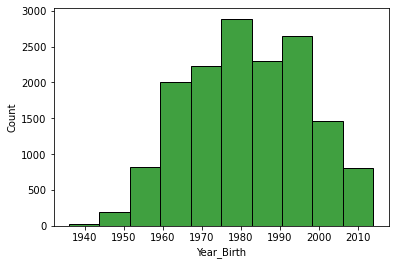

In [22]:
sns.histplot(df['Year_Birth'], color = 'g', bins = 10)

The `Year_Birth` variable has low skeweness. The mean and median values are very similar. This means that it is safe to use the mean to replace missing values.

<AxesSubplot:xlabel='RewardPoints', ylabel='Count'>

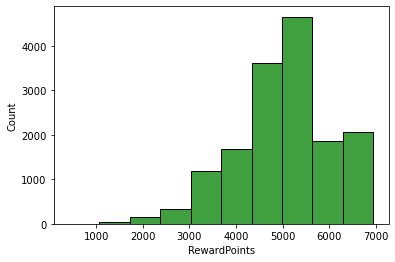

In [23]:
sns.histplot(df['RewardPoints'], color = 'g', bins = 10)

The `RewardPoints` variable has some skweness. Maybe we can try to transform this variable, so we could normalize the distribution a little bit.

<AxesSubplot:xlabel='count', ylabel='TypeTravel'>

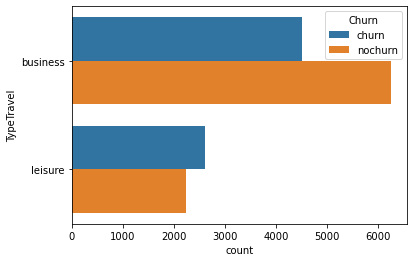

In [24]:
sns.countplot(y = 'TypeTravel', hue = 'Churn', data = df)

<AxesSubplot:xlabel='count', ylabel='RoomType'>

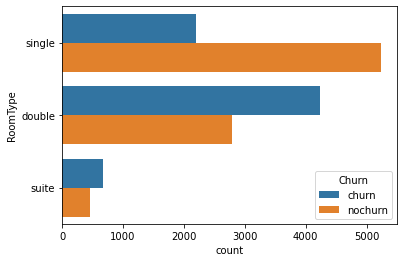

In [25]:
sns.countplot(y = 'RoomType', hue = 'Churn', data = df)

In [26]:
df.query('Churn == "churn"').groupby('Longevity')['RewardPoints'].median()

Longevity
no     5053.0
y      4852.0
yes    5068.0
Name: RewardPoints, dtype: float64

Clients with churn are the ones with more longevity and reward points.

__`Step 14`__ Check for outliers

In [27]:
#import math
#print(int(math.ceil(4.5)))

#def draw_boxplots(df):

#    column_num = df.describe().T.count()[0]

#    fig, axes = plt.subplots(3,int(math.ceil(column_num)), figsize = (14,6))

#    for column in df: 
#        if np.issubdtype(df[column], np.number): 
#            while j < 3:
#                j += 1
#                sns.boxplot(ax = axes[,0], data = df, x = 'Amenities')
#                print(df[column]) # print(df[column].describe()) or whatever other stats

        

<AxesSubplot:xlabel='Staff'>

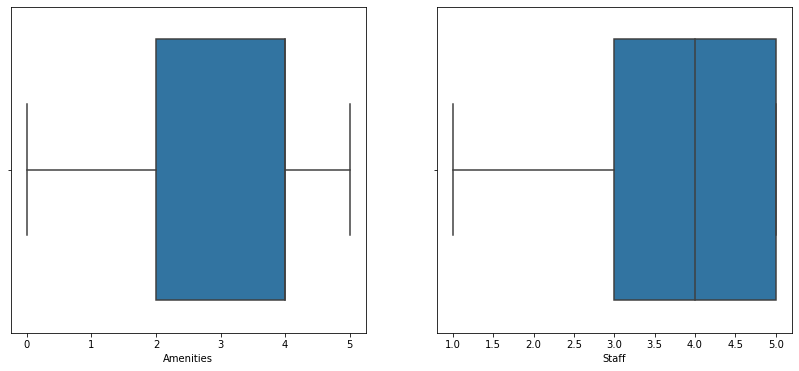

In [28]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
sns.boxplot(ax = axes[0], data = df, x = 'Amenities')
sns.boxplot(ax = axes[1], data = df, x = 'Staff')

# <font color='#BFD72F'>4. Exploring Data</font> <a class="anchor" id="prepare"></a>

[Back to Contents](#toc)

In [29]:
df['Churn'] = df['Churn'].replace({'churn': 1, 'nochurn': 0})

In [30]:
df['Churn'].astype(int)

Cust_ID
1        1
2        0
3        1
4        0
5        0
        ..
15585    1
15586    1
15587    0
15588    0
15589    1
Name: Churn, Length: 15589, dtype: int32

__`Step 15`__ Define the independent variables as __X__ and the dependent variable as __y__.

In [31]:
X = df.drop(columns='Churn')
y = df['Churn']

__`Step 16`__ Correct missclassifications.

In [32]:
X['Longevity'] = X['Longevity'].replace('y', 'yes')
X['Wifi'] = X['Wifi'].replace(6,5)

## 3.1. Feature Engineering <a class="anchor" id="feateng"></a>

__`Step 17`__ Create new variables.

In [33]:
X['Gender'] = X['Name'].str.split('.', expand=True)[0].replace({'Mr':'Male', 'Ms':'Female'})

In [34]:
X['Gender'].value_counts()

Female    7985
Male      7604
Name: Gender, dtype: int64

In [35]:
test['Gender'] = test['Name'].str.split('.', expand=True)[0].replace({'Mr':'Male', 'Ms':'Female'})

In [36]:
test['Gender'].value_counts()

Female    2632
Male      2563
Name: Gender, dtype: int64

In [37]:
X['Age'] = (date.today().year - X['Year_Birth'])
test['Age'] = (date.today().year - test['Year_Birth'])
print(X['Age'].value_counts().head(3), test['Age'].value_counts().head(3))

40.0    441
26.0    416
42.0    383
Name: Age, dtype: int64 42    138
26    136
45    134
Name: Age, dtype: int64


In [38]:
X['Age']

Cust_ID
1        48.0
2        57.0
3        49.0
4        29.0
5        33.0
         ... 
15585    34.0
15586    22.0
15587    58.0
15588    30.0
15589    39.0
Name: Age, Length: 15589, dtype: float64

In [39]:
if((X['Age']<18).any()):
    X.loc[X['Age']<18, 'Age'] = None

In [40]:
X['Age'].isna().sum()

1246

In [41]:
X['Age'] = X['Age'].fillna(X['Age'].median())

<AxesSubplot:xlabel='Age', ylabel='Count'>

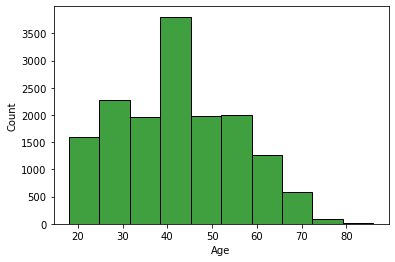

In [42]:
sns.histplot(X['Age'], color = 'g', bins = 10)

In [43]:
X = X.drop(columns=['Name','Year_Birth'])
test = test.drop(columns=['Name', 'Year_Birth'])

In [44]:
#X['log_RewardPoints'] = np.log(X['RewardPoints'])
#X['log_RewardPoints'].describe()
#test['log_RewardPoints'] = np.log(test['RewardPoints'])
#test['log_RewardPoints'].describe()

In [45]:
#X['avg_satisfaction'] = (X['Comfort'] + X['ReceptionSchedule'] + X['FoodDrink'] + X['Location'] + X['Wifi'] + X['Amenities'] + X['Staff'] + X['OnlineBooking'] + X['PriceQuality'] + X['RoomSpace'] + X['CheckOut'] + X['Checkin'] + X['Cleanliness'] + X['BarService'])/14
#test['avg_satisfaction'] = (test['Comfort'] + test['ReceptionSchedule'] + test['FoodDrink'] + test['Location'] + test['Wifi'] + test['Amenities'] + test['Staff'] + test['OnlineBooking'] + test['PriceQuality'] + test['RoomSpace'] + test['CheckOut'] + test['Checkin'] + test['Cleanliness'] + test['BarService'])/14

#X['Accommodation'] = (X['Comfort'] + X['Amenities'] + X['RoomSpace'] + X['Cleanliness'] + X['Wifi'])/5
#test['Accommodation'] = (test['Comfort'] + test['Amenities'] + test['RoomSpace'] + test['Cleanliness'] + test['Wifi'])/5

#X['Reception'] = (X['ReceptionSchedule'] + X['Staff'] + X['OnlineBooking'] + X['CheckOut'] + X['Checkin'])/5
#test['Reception'] = (test['ReceptionSchedule'] + test['Staff'] + test['OnlineBooking'] + test['CheckOut'] + test['Checkin'])/5

#X['Catering'] = (X['FoodDrink'] + X['BarService'])/2
#test['Catering'] = (test['FoodDrink'] + test['BarService'])/2

In [46]:
X['RewardPoints'] = X['RewardPoints'].astype('int')
X['Comfort'] = X['Comfort'].astype('int')
X['ReceptionSchedule'] = X['ReceptionSchedule'].astype('int')
X['FoodDrink'] = X['FoodDrink'].astype('int')
X['Location'] = X['Location'].astype('int')
X['Wifi'] = X['Wifi'].astype('int')
X['Amenities'] = X['Amenities'].astype('int')
X['Staff'] = X['Staff'].astype('int')
X['OnlineBooking'] = X['OnlineBooking'].astype('int')
X['PriceQuality'] = X['PriceQuality'].astype('int')
X['RoomSpace'] = X['RoomSpace'].astype('int')
X['CheckOut'] = X['CheckOut'].astype('int')
X['Checkin'] = X['Checkin'].astype('int')
X['Cleanliness'] = X['Cleanliness'].astype('int')
X['BarService'] = X['BarService'].astype('int')

In [47]:
#X['log_RewardPoints'] = X['log_RewardPoints'].astype('float32')
#X['avg_satisfaction'] = X['avg_satisfaction'].astype('float32')
#X['Accommodation'] = X['Accommodation'].astype('float32')
#X['Reception'] = X['Reception'].astype('float32')
#X['Catering'] = X['Catering'].astype('float32')

__`Step 18`__ Split the dataset into train and validation.

In [48]:
print('Class Ratio:',
       sum(df['Churn'])/len(df['Churn']))

Class Ratio: 0.4562191288729232


In [49]:
skf = StratifiedKFold(n_splits = 7)
counter = 0
for train_index, val_index in skf.split(X, y):
    counter +=1
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [50]:
print('Class Ratio:', sum(y_train/len(y_train)))
print('Class Ratio:', sum(y_val/len(y_val)))

Class Ratio: 0.4562191288729852
Class Ratio: 0.45621912887291904


In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13362 entries, 1 to 13427
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Longevity          13362 non-null  object 
 1   TypeTravel         13362 non-null  object 
 2   RoomType           13362 non-null  object 
 3   RewardPoints       13362 non-null  int32  
 4   Comfort            13362 non-null  int32  
 5   ReceptionSchedule  13362 non-null  int32  
 6   FoodDrink          13362 non-null  int32  
 7   Location           13362 non-null  int32  
 8   Wifi               13362 non-null  int32  
 9   Amenities          13362 non-null  int32  
 10  Staff              13362 non-null  int32  
 11  OnlineBooking      13362 non-null  int32  
 12  PriceQuality       13362 non-null  int32  
 13  RoomSpace          13362 non-null  int32  
 14  CheckOut           13362 non-null  int32  
 15  Checkin            13362 non-null  int32  
 16  Cleanliness        133

__`Step 20`__ Create two separate datasets, one for the numerical data and another one for the categorical data.

In [52]:
# Numerical data
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)

# Categorical data
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

__`Step 21`__ Scale the numerical data.

In [53]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

MinMaxScaler()

In [54]:
X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns, index = X_train.index) # Convert the array to a pandas dataframe
X_train_num_scaled.head(5)

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
Cust_ID,,,,,,,,,,,,,,,,
1,0.687662,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.441176
2,0.965449,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,0.573529
3,0.604800,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.455882
4,0.525913,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0.161765
5,0.759364,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,0.220588


In [55]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns, index = X_val.index)
X_val_num_scaled.head(5)

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age
Cust_ID,,,,,,,,,,,,,,,,
13306,0.825256,0.2,0.2,0.2,0.00,0.8,0.8,0.75,0.8,0.50,0.6,1.00,1.00,1.00,0.8,0.205882
13307,0.452836,0.4,0.4,0.4,0.25,1.0,1.0,1.00,1.0,0.75,0.2,0.00,0.75,0.50,1.0,0.117647
13309,0.480355,0.6,0.6,0.6,0.50,0.8,1.0,1.00,0.8,0.75,0.8,0.75,0.50,0.75,0.8,0.485294
13310,0.801101,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.0,0.75,0.2,0.00,0.00,0.00,1.0,0.500000
13311,0.867451,0.8,0.8,0.8,0.75,0.8,1.0,0.75,1.0,1.00,1.0,1.00,1.00,1.00,1.0,0.367647


## 3.2. Feature Selection<a class="anchor" id="featsel"></a>

__`Step 22`__ Check if there is any univariate variable.

In [56]:
X_train_num_scaled.var()

RewardPoints         0.024826
Comfort              0.077265
ReceptionSchedule    0.092440
FoodDrink            0.082687
Location             0.105520
Wifi                 0.070369
Amenities            0.073269
Staff                0.108769
OnlineBooking        0.068500
PriceQuality         0.100412
RoomSpace            0.066761
CheckOut             0.083179
Checkin              0.101236
Cleanliness          0.082722
BarService           0.067555
Age                  0.037366
dtype: float64

__`Step 23`__ Apply Spearman Correlation to try to identify the most important features.

In [57]:
all_train_num = X_train_num_scaled.join(y_train)
all_train_num.head()

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Churn
Cust_ID,,,,,,,,,,,,,,,,,
1,0.687662,0.6,0.8,0.2,0.75,0.8,0.6,0.75,0.6,0.50,0.6,0.50,0.75,0.50,0.8,0.441176,1
2,0.965449,0.2,0.2,0.2,0.00,1.0,0.6,0.75,1.0,1.00,1.0,1.00,0.00,1.00,0.4,0.573529,0
3,0.604800,0.6,0.6,0.6,0.50,0.2,0.8,0.75,0.6,0.50,0.4,0.50,0.25,0.50,0.2,0.455882,1
4,0.525913,0.2,0.2,0.2,0.00,0.8,0.8,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.6,0.161765,0
5,0.759364,0.4,0.4,0.6,0.25,1.0,1.0,1.00,1.0,1.00,0.6,0.75,0.00,0.50,1.0,0.220588,0


In [58]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()
cor_spearman = all_train_num.corr(method ='spearman')
cor_spearman

,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Age,Churn
RewardPoints,1.000000,0.066597,-0.007131,0.019005,0.009076,0.014704,0.046761,0.041986,0.039675,0.031169,0.034125,-0.016998,-0.014213,-0.000663,0.006968,0.227623,-0.047631
Comfort,0.066597,1.000000,0.427779,0.703915,0.401545,0.118832,0.411534,0.122523,0.196641,0.115397,0.127246,0.105852,0.065726,0.102768,0.132239,0.015818,-0.256879
ReceptionSchedule,-0.007131,0.427779,1.000000,0.532314,0.557505,-0.022441,0.060751,-0.002680,-0.012725,0.053294,0.033927,0.067230,0.069973,0.068328,-0.003646,0.068667,0.021739
FoodDrink,0.019005,0.703915,0.532314,1.000000,0.533163,0.007777,0.331817,0.025715,0.024756,0.029846,0.068612,0.018421,0.023582,0.022959,0.011577,0.012687,-0.129082
Location,0.009076,0.401545,0.557505,0.533163,1.000000,-0.019876,0.001801,0.005528,-0.002631,-0.023676,0.003223,-0.016779,-0.017645,-0.012381,-0.001615,0.007794,0.011782
Wifi,0.014704,0.118832,-0.022441,0.007777,-0.019876,1.000000,0.262981,0.527876,0.586308,0.065869,0.034505,0.057179,0.098281,0.049691,0.610171,0.005576,-0.240620
Amenities,0.046761,0.411534,0.060751,0.331817,0.001801,0.262981,1.000000,0.470521,0.338644,0.197076,0.182024,0.145182,0.246490,0.145870,0.367436,0.125758,-0.571600
Staff,0.041986,0.122523,-0.002680,0.025715,0.005528,0.527876,0.470521,1.000000,0.595158,0.161344,0.144219,0.130352,0.214781,0.111061,0.653201,0.107907,-0.417127
OnlineBooking,0.039675,0.196641,-0.012725,0.024756,-0.002631,0.586308,0.338644,0.595158,1.000000,0.461593,0.363973,0.420734,0.138416,0.441677,0.660668,0.072632,-0.440330
PriceQuality,0.031169,0.115397,0.053294,0.029846,-0.023676,0.065869,0.197076,0.161344,0.461593,1.000000,0.413933,0.541635,0.228597,0.577520,0.134339,0.079459,-0.347275


In [ ]:
sns.set(style="white")
corr = x.corr(method= "pearson") 
fig, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool) #Return an array of zeros (Falses) with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True,annot=True, linewidths=.5,vmin = -1, vmax = 1, ax=ax)


for t in ax.texts:
    if float(t.get_text())>=0.6 or float(t.get_text())<-0.6:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text



plt.show()

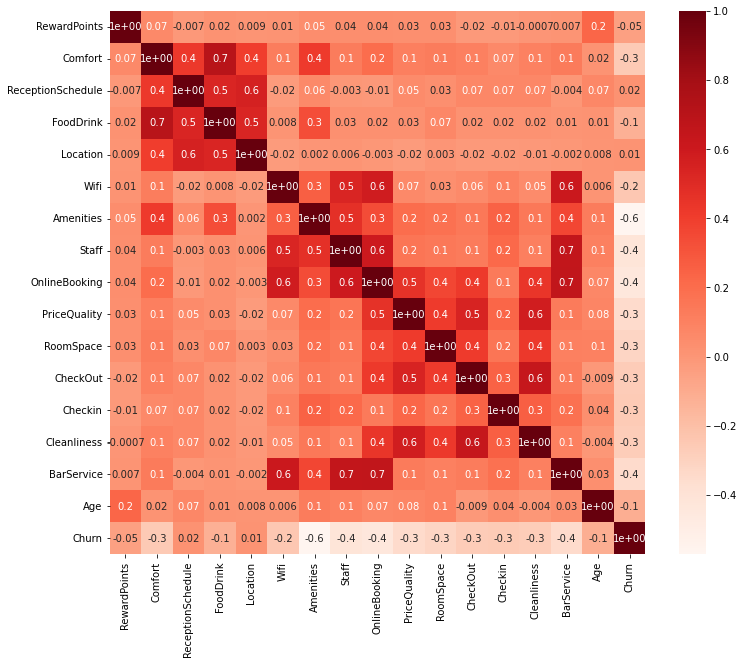

In [59]:
cor_heatmap(cor_spearman)